## Covid Bayes Net


First we create a Pomegranate Bayesian Network using the protobuf interface and our utility package, bayes, that enables one to conveniently create a Bayesian network by hand without having to fill in every probability.  The same Baysian network can start with our hand entered guesses, but can later learn from data.  Any amount of questions can be answered, including no questions, to get the probabilities of having covid , the severity of illness, and the chances of going to the hospital.  The file the Bayesian net is written in is covid_bayes.py.  Our utility package can then be used to query the network with different patient states.  This is convenient for tuning hand entered parameters .



In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install -e ../covid-bayesnet
#!{sys.executable} -m pip install protobuf

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.3)
Obtaining file:///home/opencog/covid-bayesnet
  Attempting uninstall: covid-bayes
    Found existing installation: covid-bayes 1.0
    Can't uninstall 'covid-bayes'. No files were found to uninstall.
  Running setup.py develop for covid-bayes


In [2]:
pwd


'/home/opencog/covid-bayesnet'

In [3]:
!{sys.executable} -m pip install -r requirements.txt
!sh buildproto.sh

### Covid net
Here put the name of the network you have written with the protobuf and bayes utilities.  Our example is printed out.  We created 4 functions in our utility package: any, all, if_the_else, and avg, which can together be used to express almost any set of rules, documented elsewhere.  The last lines implement the creation of the description of the network,  bayesianNetwork , with the protobuf utilities, and then the creation of the Pomegranate network with the description.  

In [4]:
text_file = open('./sn_bayes/covid_bayes.py')
file_content = text_file.read()
print(file_content)
text_file.close()

import sn_bayes
from sn_bayes.utils import any
from sn_bayes.utils import all
from sn_bayes.utils import avg
from sn_bayes.utils import if_then_else
from sn_bayes.utils import bayesInitialize
from sn_bayes.utils import addCpt


import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetwork


def covid_bayes():
	bayesianNetwork = BayesianNetwork()



	#probabilities within distributions must sum to 1.0
	#questions left blank or "prefer not to answer" will be computed

	#anomalies
	
	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varName = "oxygen_anomaly"
	anomaly.high = 200
	anomaly.low =93
	anomaly.high_percent = 0.99
	anomaly.low_percent = 0.01
	
	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varName = "heart_rate_anomaly"
	
	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varName = "hotspot_anomaly"
	anomaly.low = -1
	anomaly.high = 0.00007 # percent new daily cases
	
	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varNam

 Next run the file.  All routines are stateless.

In [5]:
import sn_bayes
from sn_bayes import covid_bayes
#%run -i './bayes/covid_bayes.py'
#%run -i './bayes/test.py'
bayesianNetwork = covid_bayes.covid_bayes()

For convenience of creating a table, here are all the variables in the net in order.  They should be mapped into the individual buckets of the rules.  The variables up to "systemically_disadvantaged" are the ones that the user may answer.  The rest are computed.

In [6]:
import sn_bayes
from sn_bayes.utils import get_var_positions
var_positions = get_var_positions(bayesianNetwork)
var_positions

{'age': 0,
 'sex': 1,
 'height_in_feet': 2,
 'weight_in_pounds': 3,
 'cardiovascular_disease': 4,
 'diabetes': 5,
 'hypertension': 6,
 'lung_disease': 7,
 'kidney_disease': 8,
 'cancer': 9,
 'immunocompromised': 10,
 'psychological_disorders': 11,
 'body_temperature': 12,
 'shortness_of_breath': 13,
 'cough': 14,
 'rash_or_skin_discoloration': 15,
 'muscle_weakness': 16,
 'difficulty_moving': 17,
 'neck_stiffness': 18,
 'low_urine': 19,
 'frequent_diarrhea': 20,
 'nausea': 21,
 'vomiting': 22,
 'decreased_smell_or_taste': 23,
 'sore_throat': 24,
 'pink_eye': 25,
 'headache': 26,
 'feeling_well': 27,
 'congestion': 28,
 'fatigue': 29,
 'muscle_aches_or_body_pain': 30,
 'abdominal_pain': 31,
 'own_thermometer': 32,
 'breathing_problems_at_night': 33,
 'cough_phlegm_color': 34,
 'bmi': 35,
 'known_exposure': 36,
 'employment_risk': 37,
 'social_distancing_following': 40,
 'close_contact_unknown_exposure': 39,
 'self_quarantine_two_weeks': 41,
 'isolation_space': 42,
 'leaving_house_per_da

Here are the positions of every bucketed response for each of the above variables:

In [7]:
import sn_bayes
from sn_bayes.utils import get_var_val_positions
var_val_positions = get_var_val_positions(bayesianNetwork)
var_val_positions

{'age': {'elderly': 0, 'adult': 1, 'young_adult': 2, 'teen': 3, 'child': 4},
 'sex': {'male': 0, 'female': 1},
 'height_in_feet': {'height_above_seven': 0,
  'height_six_to_seven': 1,
  'height_five_to_six': 2,
  'height_four_to_five': 3,
  'height_under_four': 4},
 'weight_in_pounds': {'weight_over_250': 0,
  'weight_175_to_220': 1,
  'weight_125_to_175': 2,
  'weight_100_to_125': 3,
  'weight_under_100': 4},
 'cardiovascular_disease': {'cardiovascular_disease': 0,
  'no_cardiovascular_disease': 1},
 'diabetes': {'diabetes': 0, 'no_diabetes': 1},
 'hypertension': {'hypertension': 0, 'no_hypertension': 1},
 'lung_disease': {'lung_disease': 0, 'no_lung_disease': 1},
 'kidney_disease': {'kidney_disease': 0, 'no_kidney_disase': 1},
 'cancer': {'cancer': 0, 'no_cancer': 1},
 'immunocompromised': {'immunocompromised': 0, 'not_immunocompromised': 1},
 'psychological_disorders': {'psychological_disorders': 0,
  'no_psychological_disorders': 1},
 'body_temperature': {'body_temperature_above_10

We create a spreadsheet of the above for reference

In [8]:
import pandas as pd

rows_list = []
outname = "varvals.csv"
for var, valdict in var_val_positions.items():
    rowdict = {} 
    rows_list.append(rowdict)
    varstr= var +"("
    for val, pos in valdict.items():
        varstr += val
        varstr+= ","
            
    varstr=varstr[:-1]+")"
    rowdict["variable"] = varstr        

df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

Here we create a spreadsheet that makes a Cartesian product of desired outputs with the remainder of the variables. This can be used to, for example, fill in a treatment recommendation for variables that are returned as causing the output in the explanation module 

In [9]:
import pandas as pd
#cols = ["leaves","internal","output"]
desired_output =['social_distancing',
                 'emergency_treatment',
                 'covid_risk',
                 'covid_severity']
rows_list = []
outname = "upshot.csv"

#put leaves in the first column, then internal vars along with the vars that feed them in the second.  
#and do a cartesian product with the outvars that are also internal vars (should be all of them)

for output in desired_output:
    for dist in bayesianNetwork.discreteDistributions:
        print(dist.name)
        rowdict = {} 
        rowdict["leaves"]= dist.name
        rowdict["internal"]=""
        rowdict["output"]= output
        rows_list.append(rowdict)
    for table in bayesianNetwork.conditionalProbabilityTables:
        print ("table: {}".format(table.name))
        rowdict = {}
        rowdict["leaves"]=""
        internal_str = table.name + " ("
        for var in table.randomVariables:
            print(var.name)
            internal_str += var.name
            internal_str+= ","
            
        internal_str=internal_str[:-1]+")"
        rowdict["internal"] = internal_str
        rowdict["output"]= output
        rows_list.append(rowdict)
df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

age
sex
height_in_feet
weight_in_pounds
cardiovascular_disease
diabetes
hypertension
lung_disease
kidney_disease
cancer
immunocompromised
psychological_disorders
body_temperature
shortness_of_breath
cough
rash_or_skin_discoloration
muscle_weakness
difficulty_moving
neck_stiffness
low_urine
frequent_diarrhea
nausea
vomiting
decreased_smell_or_taste
sore_throat
pink_eye
headache
feeling_well
congestion
fatigue
muscle_aches_or_body_pain
abdominal_pain
own_thermometer
breathing_problems_at_night
cough_phlegm_color
bmi
known_exposure
employment_risk
social_distancing_following
close_contact_unknown_exposure
social_distancing_following
self_quarantine_two_weeks
isolation_space
leaving_house_per_day
high_risk_place_per_week
deliveries_per_week
mask
public_transportation_per_week
workplace_social_distancing
daily_contacts_social_distancing
visits_per_week
wash_hands_per_day
tested
swab_test
antibody_test
saliva_test
hotspot_anomaly
heart_rate_anomaly
heart_rate_variability_anomaly
oxygen_anoma

Here is a one more csv that uses a utility function to express the net in  a tree form, in a data frame and then prints it out 

In [10]:
import sn_bayes
from sn_bayes.utils import make_tree
import pandas as pd
df = make_tree(bayesianNetwork)
outname = "tree.csv"
df.to_csv(outname, index = False)

In [11]:
df

,level0,level1,level2,level3,level4,level5,level6,level7
0,age),"covid_test(swab_test,antibody_test,saliva_test)","comorbidities(chronic_conditions,metabolic_dis...",serious_shortness_of_breath(shortness_of_breat...,"low_covid(shortness_of_breath,body_temperature...","covid_symptom_level(high_covid,medium_covid,lo...","high_covid_risk(covid_symptom_level,covid_test...","covid_risk(high_covid_risk,medium_covid_risk,l..."
1,sex),"metabolic_disease(cardiovascular_disease,diabe...",covid_symptoms(gastrointestinal_covid_symptoms...,"covid_vulnerabilities(covid_symptoms,social_di...","medium_covid(serious_shortness_of_breath,body_...",None,"medium_covid_risk(covid_symptom_level,covid_en...",None
2,height_in_feet),"chronic_conditions(lung_disease,cancer,kidney_...",social_distancing(social_distancing_environmen...,"covid_severity(age,comorbidities)","high_covid(cough,muscle_weakness,covid_vulnera...",None,"low_covid_risk(covid_symptom_level,covid_envir...",None
3,weight_in_pounds),"demographics(age,bmi)",social_distancing_binary(social_distancing_env...,"covid_severity_binary(age,comorbidities)",None,None,"covid_risk_binary(covid_symptom_level,covid_en...",None
4,cardiovascular_disease),"cold_symptoms(cough_phlegm_color,fatigue,conge...","covid_environment(exposure,hotspot_anomaly)",None,None,None,None,None
5,diabetes),specific_covid_symptoms(rash_or_skin_discolora...,"emergency_treatment(possible_dehydration,possi...",None,None,None,None,None
6,hypertension),"head_and_neck_covid_symptoms(neck_stiffness,so...",None,None,None,None,None,None
7,lung_disease),"gastrointestinal_covid_symptoms(low_urine,naus...",None,None,None,None,None,None
8,kidney_disease),"personal_social_distancing(isolation_space,del...",None,None,None,None,None,None
9,cancer),social_distancing_connectedness(visits_per_wee...,None,None,None,None,None,None


Here is the description of the Bayesian network in protobuf that we just created with the running of the python file.  Only the "leaves" have initial probabilities (DiscreteDistribution), the conditional probabilities (ConditionalProbabilityTable) are to be computed:

In [12]:
bayesianNetwork

discreteDistributions {
  name: "age"
  variables {
    name: "elderly"
    probability: 0.10000000149011612
  }
  variables {
    name: "adult"
    probability: 0.30000001192092896
  }
  variables {
    name: "young_adult"
    probability: 0.20000000298023224
  }
  variables {
    name: "teen"
    probability: 0.10000000149011612
  }
  variables {
    name: "child"
    probability: 0.10000000149011612
  }
}
discreteDistributions {
  name: "sex"
  variables {
    name: "male"
    probability: 0.5
  }
  variables {
    name: "female"
    probability: 0.5
  }
}
discreteDistributions {
  name: "height_in_feet"
  variables {
    name: "height_above_seven"
    probability: 0.05000000074505806
  }
  variables {
    name: "height_six_to_seven"
    probability: 0.25
  }
  variables {
    name: "height_five_to_six"
    probability: 0.30000001192092896
  }
  variables {
    name: "height_four_to_five"
    probability: 0.15000000596046448
  }
  variables {
    name: "height_under_four"
    probab

Here is the Pomegranate net we just made with the description.  Here we compile the net so we can compute probabilities with it.

In [13]:
from sn_bayes.utils import bayesInitialize
covid = bayesInitialize(bayesianNetwork)

In [14]:
covid.bake()

We we call a Pomegranate routine that shows the computed probabilities of every variable.  We have made our own utility that pulls out particular variables.

In [15]:
covid.predict_proba({}) 

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "elderly" :0.12499999883584714,
            "adult" :0.3750000058207651,
            "young_adult" :0.24999999767169337,
            "teen" :0.12499999883584714,
            "child" :0.12499999883584714
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "male" :0.5,
            "female" :0.5
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "height_above_seven" :0.04999999981373565,
            "height_six_to_seven" :0.24999999534338715,
            "height_five_to_six" :0.3000000063329933,
            "height_four_to_five" :0.15000000316649675,
            "height_under_four" :0.24999999534338715
        

Here we use our query util to enter patient states as evidence (evidence), and then see the probabilities of particular variables we are interested in (outvars), in this case, the output variables.  It needs the compiled Pomegranate Bayesian network as well as the description of the network.  This routine can be used to enter a particular patients state , one question at a time, to get a continual change in probability of all states. Below, we first look at the probability of emergency treatment, covid risk, and covid severity, in general.  Then, we look at it given the information that the patient is elderly. We see that the chance of severity has increased. Adding more risk factors increases risk more, and adding more severity factors increases severity more.

In [16]:
import sn_bayes
from sn_bayes.utils import query
evidence = {}
outvars= ["social_distancing_binary",
          "covid_risk_binary",
          "covid_severity_binary"]
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing_binary': {'no_social_distancing': 0.0034774019630282346,
  'high_social_distancing': 0.0,
  'low_social_distancing': 0.8619268178620686,
  'medium_social_distancing': 0.13459578017490303},
 'covid_risk_binary': {'high_covid_risk': 0.1769275950304215,
  'low_covid_risk': 0.14103305668954302,
  'medium_covid_risk': 0.6258836278648597,
  'no_covid_risk': 0.05615572041517576},
 'covid_severity_binary': {'low_covid_severity': 0.027581985692421786,
  'no_covid_severity': 0.009193995230807427,
  'medium_covid_severity': 0.4999999960283934,
  'high_covid_severity': 0.4632240230483774}}

In [17]:
evidence["age"]= "elderly"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing_binary': {'no_social_distancing': 0.0034774019630282346,
  'high_social_distancing': 0.0,
  'low_social_distancing': 0.8619268178620686,
  'medium_social_distancing': 0.13459578017490303},
 'covid_risk_binary': {'high_covid_risk': 0.17692759503042152,
  'low_covid_risk': 0.1400974375079144,
  'medium_covid_risk': 0.6266343345278542,
  'no_covid_risk': 0.056340632933809955},
 'covid_severity_binary': {'low_covid_severity': 0.0,
  'no_covid_severity': 0.0,
  'medium_covid_severity': 0.0,
  'high_covid_severity': 1.0}}

In [18]:
evidence["body_temperature"]= "body_temperature_above_102F"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing_binary': {'no_social_distancing': 0.0034774019630282346,
  'high_social_distancing': 0.0,
  'low_social_distancing': 0.8619268178620686,
  'medium_social_distancing': 0.13459578017490303},
 'covid_risk_binary': {'high_covid_risk': 0.17692759503042135,
  'low_covid_risk': 0.0004750448770471586,
  'medium_covid_risk': 0.8205574614984503,
  'no_covid_risk': 0.0020398985940812547},
 'covid_severity_binary': {'low_covid_severity': 0.0,
  'no_covid_severity': 0.0,
  'medium_covid_severity': 0.0,
  'high_covid_severity': 1.0}}

In [19]:
evidence["diabetes"]= "diabetes"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing_binary': {'no_social_distancing': 0.0034774019630282346,
  'high_social_distancing': 0.0,
  'low_social_distancing': 0.8619268178620686,
  'medium_social_distancing': 0.13459578017490303},
 'covid_risk_binary': {'high_covid_risk': 0.17692759503042135,
  'low_covid_risk': 0.0004750448770471586,
  'medium_covid_risk': 0.8205574614984503,
  'no_covid_risk': 0.0020398985940812547},
 'covid_severity_binary': {'low_covid_severity': 0.0,
  'no_covid_severity': 0.0,
  'medium_covid_severity': 0.0,
  'high_covid_severity': 1.0}}

The explain function will tell you which nodes, whether inner or leaf, when changed, change the output variable.  A variable is on the reverse explain list if we want to know what changes to other variables will increase it.  Otherwise we look to 
changes that decrease the variable to be explained.  One may select which explanations are relevant for their purposes, as this is just a measure of dependence.

In [20]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing_binary': {},
 'covid_risk_binary': {'body_temperature': 0.19687627100542404,
  'covid_test': 0.32208523928321353,
  'serious_shortness_of_breath': 0.12448970158658701,
  'covid_vulnerabilities': 0.5001273377619395,
  'low_covid': 0.3399122758936851,
  'high_covid': 0.3399122758936851,
  'exposure': 0.12696366273112947,
  'covid_environment': 0.5705574614984503,
  'covid_symptom_level': 0.5705574614984503,
  'high_covid_risk': 0.5705574614984503,
  'medium_covid_risk': 0.8205574614984503,
  'low_covid_risk': 0.5705574614984503},
 'covid_severity_binary': {'chronic_conditions': 0.5000000000000002}}

In [21]:
evidence["known_exposure"]= "known_exposure"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing_binary': {'no_social_distancing': 0.0034774019630282346,
  'high_social_distancing': 0.0,
  'low_social_distancing': 0.8619268178620686,
  'medium_social_distancing': 0.13459578017490303},
 'covid_risk_binary': {'high_covid_risk': 0.20798693141630759,
  'low_covid_risk': 0.0,
  'medium_covid_risk': 0.7908250489668013,
  'no_covid_risk': 0.0011880196168908706},
 'covid_severity_binary': {'low_covid_severity': 0.0,
  'no_covid_severity': 0.0,
  'medium_covid_severity': 0.0,
  'high_covid_severity': 1.0}}

In [22]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing_binary': {},
 'covid_risk_binary': {'body_temperature': 0.09300124425850498,
  'covid_test': 0.29157504897564923,
  'serious_shortness_of_breath': 0.058806970925427526,
  'covid_vulnerabilities': 0.4358191916455334,
  'low_covid': 0.25831626298490074,
  'high_covid': 0.25831626298490074,
  'covid_environment': 0.5408250489668013,
  'covid_symptom_level': 0.5408250489668013,
  'high_covid_risk': 0.5408250489668013,
  'medium_covid_risk': 0.7908250489668013},
 'covid_severity_binary': {'chronic_conditions': 0.5000000000000002}}

In [23]:
evidence = {}
evidence["employment_risk"]= "health_care_worker_or_first_responder"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing_binary': {'no_social_distancing': 0.0034774019630282346,
  'high_social_distancing': 0.0,
  'low_social_distancing': 0.8619268178620686,
  'medium_social_distancing': 0.13459578017490303},
 'covid_risk_binary': {'high_covid_risk': 0.20798693141630745,
  'low_covid_risk': 0.060444252554742964,
  'medium_covid_risk': 0.6988642013743642,
  'no_covid_risk': 0.03270461465458541},
 'covid_severity_binary': {'low_covid_severity': 0.027581985692421786,
  'no_covid_severity': 0.009193995230807427,
  'medium_covid_severity': 0.4999999960283934,
  'high_covid_severity': 0.4632240230483774}}

In [24]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing_binary': {},
 'covid_risk_binary': {'covid_test': 0.25766933408252807,
  'covid_vulnerabilities': 0.34385834405309634,
  'low_covid': 0.16635541539246368,
  'medium_covid': 0.16635541539246368,
  'covid_environment': 0.4488642013743642,
  'covid_symptom_level': 0.4488642013743642,
  'high_covid_risk': 0.4488642013743642,
  'medium_covid_risk': 0.6988642013743642,
  'low_covid_risk': 0.4488642013743642},
 'covid_severity_binary': {'comorbidities': 0.2499999960283934}}

Now start the server from somewhere else than here.  Use the first command uncommented if you are running in a notebook , or the second command if you are running from command line.

In [25]:
#%run -i './sn_service/bayes_service.py' 
#python3 ./sn_service/bayes_service.py


Here is a test of the server.  It is saving an ID for the network sent to it, in a pickle file of json.  If you run the service again, it will start at another id.

In [29]:
%run -i './test_bayes_service.py' auto

Exception
<_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "failed to connect to all addresses"
	debug_error_string = "{"created":"@1602594322.865440565","description":"Failed to pick subchannel","file":"src/core/ext/filters/client_channel/client_channel.cc","file_line":4089,"referenced_errors":[{"created":"@1602594322.865438482","description":"failed to connect to all addresses","file":"src/core/ext/filters/client_channel/lb_policy/pick_first/pick_first.cc","file_line":393,"grpc_status":14}]}"
>


Wearable values can be sent it, and if there is a seasonal anomaly it will be set in the bayesian network

Read in apple watch data.  Send in a proto of a value and an interval.   For synced data, make sure the interval of the first items all tell the distance from the same point.  An interval of zero (the default in proto) means that the same as the previous is repeated.  The following gives an example with synced data.

In [27]:
import os
import re
import fnmatch
import pandas as pd

id_re = re.compile(r'^(\d+)\_.+')

anomaly_tuples = {}

for root, dirs, files in os.walk("./data/sleep-accel/heart_rate"):
    for i, filename in enumerate(files):
        if i < 10:
            #print(filename)
            pid = id_re.match(filename)
            print (f'patient {pid[1]}')
            anomaly_tuples[pid[1]] = {}
            heart_rate_df = pd.read_csv(f'./data/sleep-accel/heart_rate/{filename}')
            anomaly_tuples[pid[1]]["heart_rate_anomaly"]=[]
            firstrow = None
            lastrow = None
            for index, row in heart_rate_df.iterrows():
                if firstrow is None:
                    firstrow= row[0]
                thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
                lastrow = row[0]
                anomaly_tuples[pid[1]]["heart_rate_anomaly"].append((row[1],thisrow))


            listOfFiles = os.listdir("./data/sleep-accel/steps/")
            pattern = (f"{pid[1]}*")
            for entry in listOfFiles:
                if fnmatch.fnmatch(entry,pattern):
                    #print(entry)
                    steps_df = pd.read_csv(f'./data/sleep-accel/steps/{entry}')
                    anomaly_tuples[pid[1]]["oxygen_anomaly"]=[] #fixme, use a steps_anomaly
                    lastrow = None
                    for index, row in steps_df.iterrows():

                        if firstrow < row[0]:
                            thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
                            lastrow = row[0]
                            if thisrow:
                                anomaly_tuples[pid[1]]["oxygen_anomaly"].append((row[1],thisrow))
threshold = {}
threshold['heart_rate_anomaly']={}
threshold['oxygen_anomaly']={}
threshold['heart_rate_anomaly']['high']= 100
threshold['heart_rate_anomaly']['low']=65
threshold['heart_rate_anomaly']['low_percent'] = 0.03
threshold['heart_rate_anomaly']['high_percent']= 0.97
threshold['oxygen_anomaly']['high']= 2000
threshold['oxygen_anomaly']['low']=-1
threshold['oxygen_anomaly']['low_percent'] = 0.03
threshold['oxygen_anomaly']['high_percent']= 0.97


patient 9106476
patient 2638030
patient 4426783
patient 1449548
patient 3997827
patient 46343
patient 1360686
patient 759667
patient 6220552
patient 8000685


9106476
AutoregressionAD-oxygen_anomaly
Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.
heart_rate_anomaly
autoregression
heart_rate_anomaly
interquartile
oxygen_anomaly
interquartile
heart_rate_anomaly
threshold
oxygen_anomaly
threshold
heart_rate_anomaly
quantile
heart_rate_anomaly
threshold
oxygen_anomaly
quantile
oxygen_anomaly
threshold
{'heart_rate_anomaly': 'heart_rate_anomaly', 'oxygen_anomaly': 'no_oxygen_anomaly'}


TypeError: 'Query' object is not callable

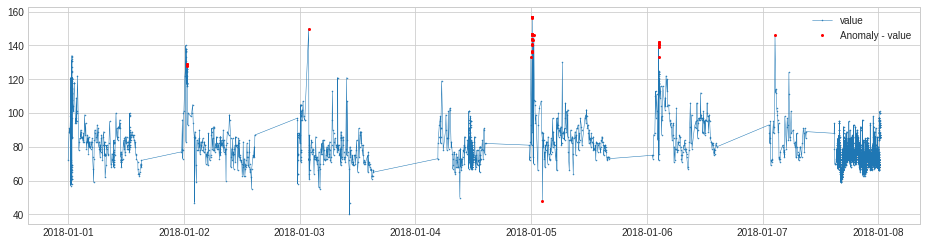

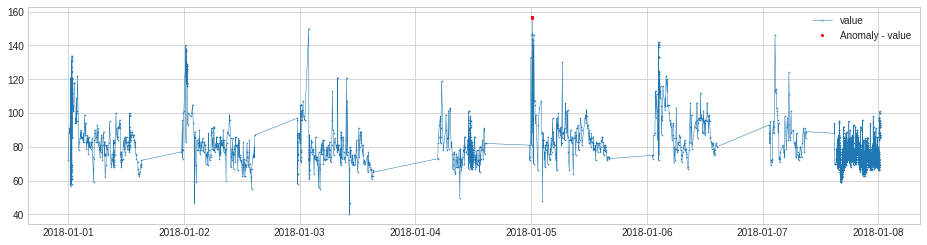

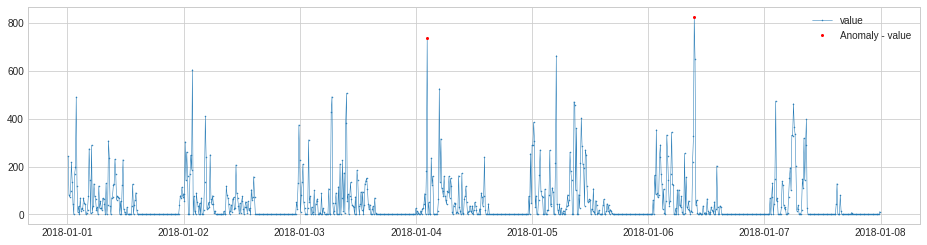

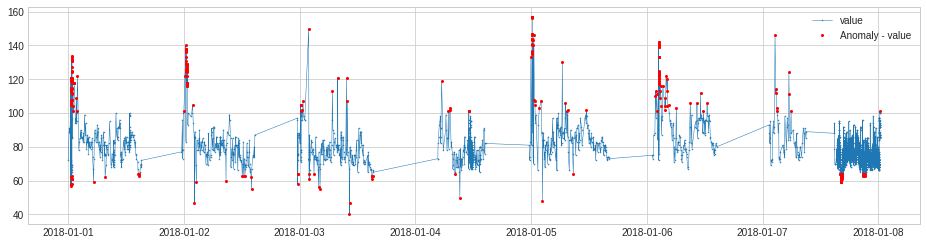

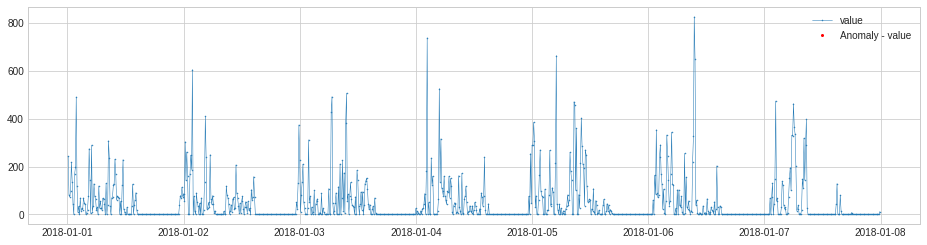

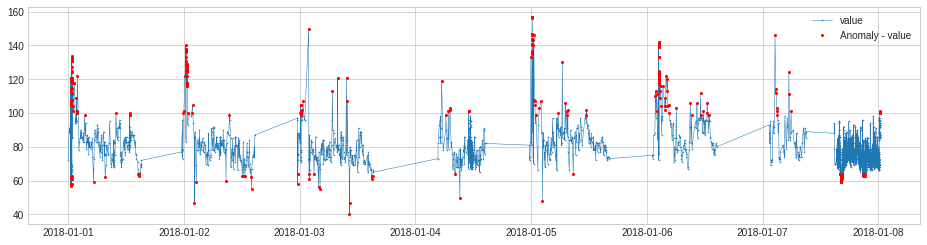

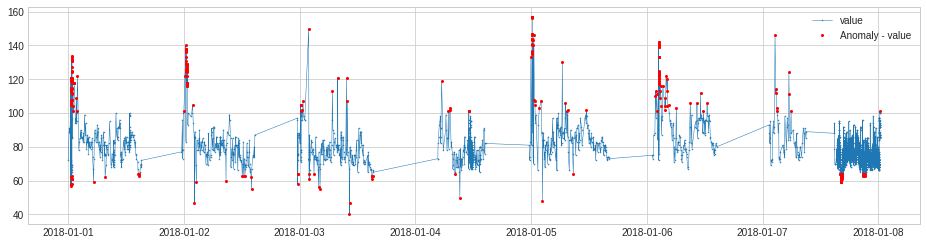

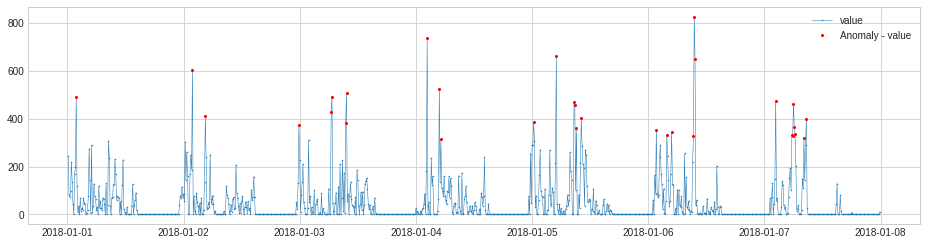

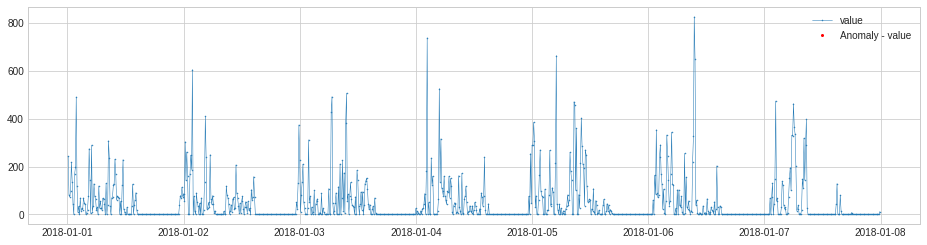

In [28]:
from sn_bayes.utils import detect_anomalies, detect_anomalies_threshold, detect_anomalies_threshold_and_baseline
from adtk.visualization import plot


for pid,at in anomaly_tuples.items():
    print(pid)
    wearable_evidence,anomaly_dict,signal_dict = detect_anomalies(at,bayesianNetwork)
    for var,anomalies_dict in anomaly_dict.items():
        for detector,anomalies in anomalies_dict.items():
            print (var)
            print(detector)
            plot(signal_dict[var], anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);
    wearable_evidence,anomaly_dict,signal_dict = detect_anomalies_threshold(at,bayesianNetwork,threshold)
    for var,anomalies_dict in anomaly_dict.items():
        for detector,anomalies in anomalies_dict.items():
            print (var)
            print(detector)
            plot(signal_dict[var], anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);
    wearable_evidence,anomaly_dict,signal_dict = detect_anomalies_threshold_and_baseline(at,bayesianNetwork,threshold)
    for var,anomalies_dict in anomaly_dict.items():
        for detector,anomalies in anomalies_dict.items():
            print (var)
            print(detector)
            plot(signal_dict[var], anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);
   
    print(wearable_evidence)
    evidence.update(wearable_evidence)
    results = query(covid,bayesianNetwork,evidence,outvars)
    print (f'pid {pid} results {results}')
